In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

**10. In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data.
(a) Generate a simulated data set with 20 observations in each of
three classes (i.e. 60 observations total), and 50 variables.
Hint: There are a number of functions in R that you can use to
generate data. One example is the rnorm() function; runif() is
another option. Be sure to add a mean shift to the observations
in each class so that there are three distinct classes.**

In [2]:
np.random.seed(2012)
X = np.random.normal(0,10,(60,50)) 

In [3]:
X[:20] = X[:20] - 5
X[40:] = X[40:] + 5

**(b) Perform PCA on the 60 observations and plot the first two prin-
cipal component score vectors. Use a different color to indicate
the observations in each of the three classes. If the three classes
appear separated in this plot, then continue on to part (c). If
not, then return to part (a) and modify the simulation so that
there is greater separation between the three classes. Do not
continue to part (c) until the three classes show at least some
separation in the first two principal component score vectors.**

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
X_Standard = scale(X)
pca = PCA()
pca.fit(X_Standard)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

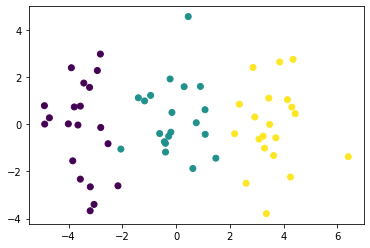

In [5]:
y = np.repeat([0,1,2],20)
plt.scatter(pca.transform(X_Standard)[:,0],pca.transform(X_Standard)[:,1],c = y)

**(c) Perform K-means clustering of the observations with K = 3.
How well do the clusters that you obtained in K-means cluster-
ing compare to the true class labels?
Hint: You can use the table() function in R to compare the true
class labels to the class labels obtained by clustering. Be careful
how you interpret the results: K-means clustering will arbitrarily
number the clusters, so you cannot simply check whether the true
class labels and clustering labels are the same.**

In [6]:
from sklearn.cluster import KMeans
km_out = KMeans(n_clusters=3, n_init=20)
km_out.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
km_out.labels_

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
pd_cut = pd.DataFrame({'orgin':y,'km_out':km_out.labels_})

In [9]:
pd.crosstab(pd_cut.orgin,pd_cut.km_out)

km_out,0,1,2
orgin,,,
0,0,15,5
1,3,2,15
2,20,0,0


分类效果较好，仅有6个分类错误

**(d) Perform K-means clustering with K = 2. Describe your results.**

In [10]:
km_out2 = KMeans(n_clusters=2, n_init=20)
km_out2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
pd_cut['km_out2'] = km_out2.labels_

In [12]:
pd.crosstab(pd_cut.orgin,pd_cut.km_out2)

km_out2,0,1
orgin,,
0,20,0
1,14,6
2,0,20


有一类分为了两类，另外两类分开

**(e) Now perform K-means clustering with K = 4, and describe your
results.**

In [13]:
km_out4 = KMeans(n_clusters=4, n_init=20)
km_out4.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
pd_cut['km_out4'] = km_out4.labels_

In [15]:
pd.crosstab(pd_cut.orgin,pd_cut.km_out4)

km_out4,0,1,2,3
orgin,,,,
0,5,0,15,0
1,14,4,2,0
2,0,12,0,8


有一类划分正确，另外两类各自分类了3类（有重叠）

**(f) Now perform K-means clustering with K = 3 on the first two
principal component score vectors, rather than on the raw data.
That is, perform K-means clustering on the 60 × 2 matrix of
which the first column is the first principal component score
vector, and the second column is the second principal component
score vector. Comment on the results**

In [16]:
X_p2 = pca.transform(X_Standard)[:,:2]

In [17]:
km_out_p2 = KMeans(n_clusters=3, n_init=20)
km_out_p2.fit(X_p2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
pd_cut['km_out_p2'] = km_out_p2.labels_

In [19]:
pd.crosstab(pd_cut.orgin,pd_cut.km_out_p2)

km_out_p2,0,1,2
orgin,,,
0,0,0,20
1,19,0,1
2,0,20,0


分类错误1个，好于原始数据分类，说明了所添加的偏移包含在前两个主成分中

**(g) Using the scale() function, perform K-means clustering with
K = 3 on the data after scaling each variable to have standard
deviation one. How do these results compare to those obtained
in (b)? Explain.**

In [20]:
km_out_scale = KMeans(n_clusters=3, n_init=20)
km_out_scale.fit(X_Standard)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
pd_cut['km_out_scale'] = km_out_scale.labels_

In [22]:
pd.crosstab(pd_cut.orgin,pd_cut.km_out_scale)

km_out_scale,0,1,2
orgin,,,
0,0,1,19
1,0,19,1
2,19,1,0


标准化的结果分类错误3个，好于原始数据，在标准化的过程中，将50个变量中影响大的变量权重降低，相对的话，整体偏移影响将大于个别变量的抖动。（该测试偏移是加在所有变量上）

# 对比测试部分变量有偏移变化的数据

In [23]:
#步骤a
np.random.seed(2012)
X = np.random.normal(0,10,(60,50)) 
def X_bias(colunms_num):
    for i in range(colunms_num):
        X[:20,i] = X[:20,i] + 20 * ((-1) ** (i+1))
        X[40:,i] = X[40:,i] + 20 * ((-1) ** (i))
X_bias(10)

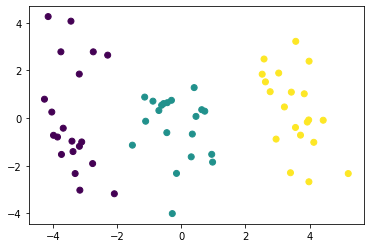

In [24]:
#步骤b
X_Standard = scale(X)
pca = PCA()
pca.fit(X_Standard)
plt.scatter(pca.transform(X_Standard)[:,0],pca.transform(X_Standard)[:,1],c = y)

In [25]:
#步骤c
km_out = KMeans(n_clusters=3, n_init=20)
km_out.fit(X)
pd_cut = pd.DataFrame({'orgin':y,'km_out':km_out.labels_})
pd.crosstab(pd_cut.orgin,pd_cut.km_out)

km_out,0,1,2
orgin,,,
0,0,20,0
1,20,0,0
2,0,0,20


In [26]:
#步骤d
km_out2 = KMeans(n_clusters=2, n_init=20)
km_out2.fit(X)
pd_cut['km_out2'] = km_out2.labels_
pd.crosstab(pd_cut.orgin,pd_cut.km_out2)

km_out2,0,1
orgin,,
0,20,0
1,17,3
2,0,20


In [27]:
#步骤e
km_out4 = KMeans(n_clusters=4, n_init=20)
km_out4.fit(X)
pd_cut['km_out4'] = km_out4.labels_
pd.crosstab(pd_cut.orgin,pd_cut.km_out4)

km_out4,0,1,2,3
orgin,,,,
0,0,4,16,0
1,0,0,0,20
2,20,0,0,0


In [28]:
#步骤f
X_p2 = pca.transform(X_Standard)[:,:2]
km_out_p2 = KMeans(n_clusters=3, n_init=20)
km_out_p2.fit(X_p2)
pd_cut['km_out_p2'] = km_out_p2.labels_
pd.crosstab(pd_cut.orgin,pd_cut.km_out_p2)

km_out_p2,0,1,2
orgin,,,
0,1,0,19
1,20,0,0
2,0,20,0


In [29]:
#步骤g
km_out_scale = KMeans(n_clusters=3, n_init=20)
km_out_scale.fit(X_Standard)
pd_cut['km_out_scale'] = km_out_scale.labels_
pd.crosstab(pd_cut.orgin,pd_cut.km_out_scale)

km_out_scale,0,1,2
orgin,,,
0,16,0,4
1,0,1,19
2,0,20,0


在部分变量偏移的情况下，可以看出标准化后的K均值聚类明显差于原始数据结果，这是因为标准化后，偏移在部分变量上造成的变异相对全部变量的正常分布变化已不明显。